In [1]:
import numpy as np
import matplotlib.pyplot as plt

class MultilayerPerceptron:
    def __init__(self, input_size, hidden_layer_sizes, output_size, activation_functions_type):
        self.input_size = input_size
        self.hidden_layer_sizes = hidden_layer_sizes
        self.output_size = output_size
        self.af_type = activation_functions_type
        self.layers = len(hidden_layer_sizes) + 1 

        self.weights = [np.random.random((input_size, hidden_layer_sizes[0]))]
        self.biases = [np.random.random((1, hidden_layer_sizes[0]))]

        for i in range(1, self.layers-1):
            self.weights.append(np.random.random((hidden_layer_sizes[i - 1], hidden_layer_sizes[i])))
            self.biases.append(np.random.random((1, hidden_layer_sizes[i])))
        self.weights.append(np.random.random((hidden_layer_sizes[self.layers-2], output_size)))
        self.biases.append(np.random.random((1, output_size)))
    
    def activation_function(self, x, type = 'sigmoid'):
        if type == 'sigmoid':
            return 2 / (1 + np.exp(-x)) - 1
        elif type == 'linear':
            return x
    def activation_function_derivative(self, x, type = 'sigmoid'):
        if type == 'sigmoid':
            return (1 - self.activation_function(x, type = 'sigmoid') ** 2) / 2
        elif type == 'linear':
            return 1
    # def sigmoid(self, x):
    #     return 2 / (1 + np.exp(-x)) - 1

    # def sigmoid_derivative(self, x):
    #     return (1 - self.sigmoid(x) ** 2) / 2

    def forward(self, x):
        layer_output = x

        for i in range(self.layers):
            layer_input = layer_output @ self.weights[i] + self.biases[i]
            layer_output = self.activation_function(layer_input, self.af_type[i-1])

        return layer_output

    def gradient_calculation(self, x, y):
        layer_outputs = [x]
        layer_inputs = []

        # Forward pass
        for i in range(self.layers):
            layer_input = layer_outputs[i] @ self.weights[i] + self.biases[i]
            layer_inputs.append(layer_input)
            layer_output = self.activation_function(layer_input, self.af_type[i-1])
            layer_outputs.append(layer_output)

        # Backpropagation
        error = y - layer_outputs[-1]
        delta = error * self.activation_function_derivative(layer_inputs[-1], self.af_type[-1])
        grads = [{'weights': 0, 'bias': 0} for _ in range(self.layers)]

        for i in range(self.layers - 1, -1, -1):
            grads[i]['weights'] = np.sum(np.expand_dims(delta,1)*np.expand_dims(layer_outputs[i],2),0) #layer_outputs[i].T @ delta
            grads[i]['bias'] = np.sum(delta, axis=0, keepdims=True)
            if i > 0:
                error = delta @ self.weights[i].T
                delta = error * self.activation_function_derivative(layer_inputs[i - 1], self.af_type[i - 1])

        return grads

    def train(self, x, y, update_step_num=10, learning_rate=0.001):
        for i in range(update_step_num):
            grads = self.gradient_calculation(x, y)

            for j in range(self.layers):
                self.weights[j] += learning_rate * grads[j]['weights']
                self.biases[j] += learning_rate * grads[j]['bias']



In [2]:
input_size = 2
hidden_layer_sizes = [4, 5, 6]  
layers_af = ['sigmoid', 'sigmoid', 'linear']
output_size = 1

x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([1,0,0,1]).reshape([-1,1]) 

mlp = MultilayerPerceptron(input_size, hidden_layer_sizes, output_size, layers_af)
mlp.train(x, y, update_step_num=10000, learning_rate=0.1)

y_hat = mlp.forward(x)
print("Predictions:")
print(y_hat)

Predictions:
[[1.]
 [0.]
 [0.]
 [1.]]


In [71]:
mlp.af_type

['sigmoid', 'sigmoid', 'linear']

In [72]:
x = np.linspace(0,1,100)
X = np.zeros([x.size**2, 2])
counter = 0
for i in range(x.size):
    for j in range(x.size):
        X[counter,:] = np.array([x[i], x[j]]) 
        counter += 1 
# X, X = np.meshgrid(x, x)
Y = mlp.forward(X)
X2, X2 = np.meshgrid(x,x)
Y_plot = np.copy(X2)
counter = 0
for i in range(x.size):
    for j in range(x.size):
        Y_plot[i, j] = Y[counter]
        counter += 1 

C:\Users\kiano\AppData\Local\Temp\ipykernel_23636\2555901035.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y_plot[i, j] = Y[counter]


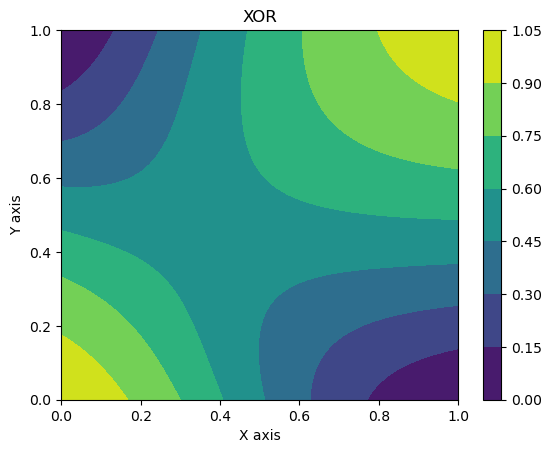

In [73]:
X, Y = np.meshgrid(x, x)

plt.contourf(X, Y, Y_plot, cmap='viridis')  

plt.colorbar()

plt.title('XOR')
plt.xlabel('X axis')
plt.ylabel('Y axis')

plt.show()
